## Image Classification Using CNN
---
This Jupyter Notebook presents a deep learning-based approach to image classification using Convolutional Neural Networks (CNNs) on the CIFAR-10 dataset.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [3]:
print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [4]:
print(y_train[:5])

[[6]
 [9]
 [9]
 [4]
 [1]]


In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

print(y_train[:5], y_test[:5])

[6 9 9 4 1] [3 8 8 0 6]


In [6]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

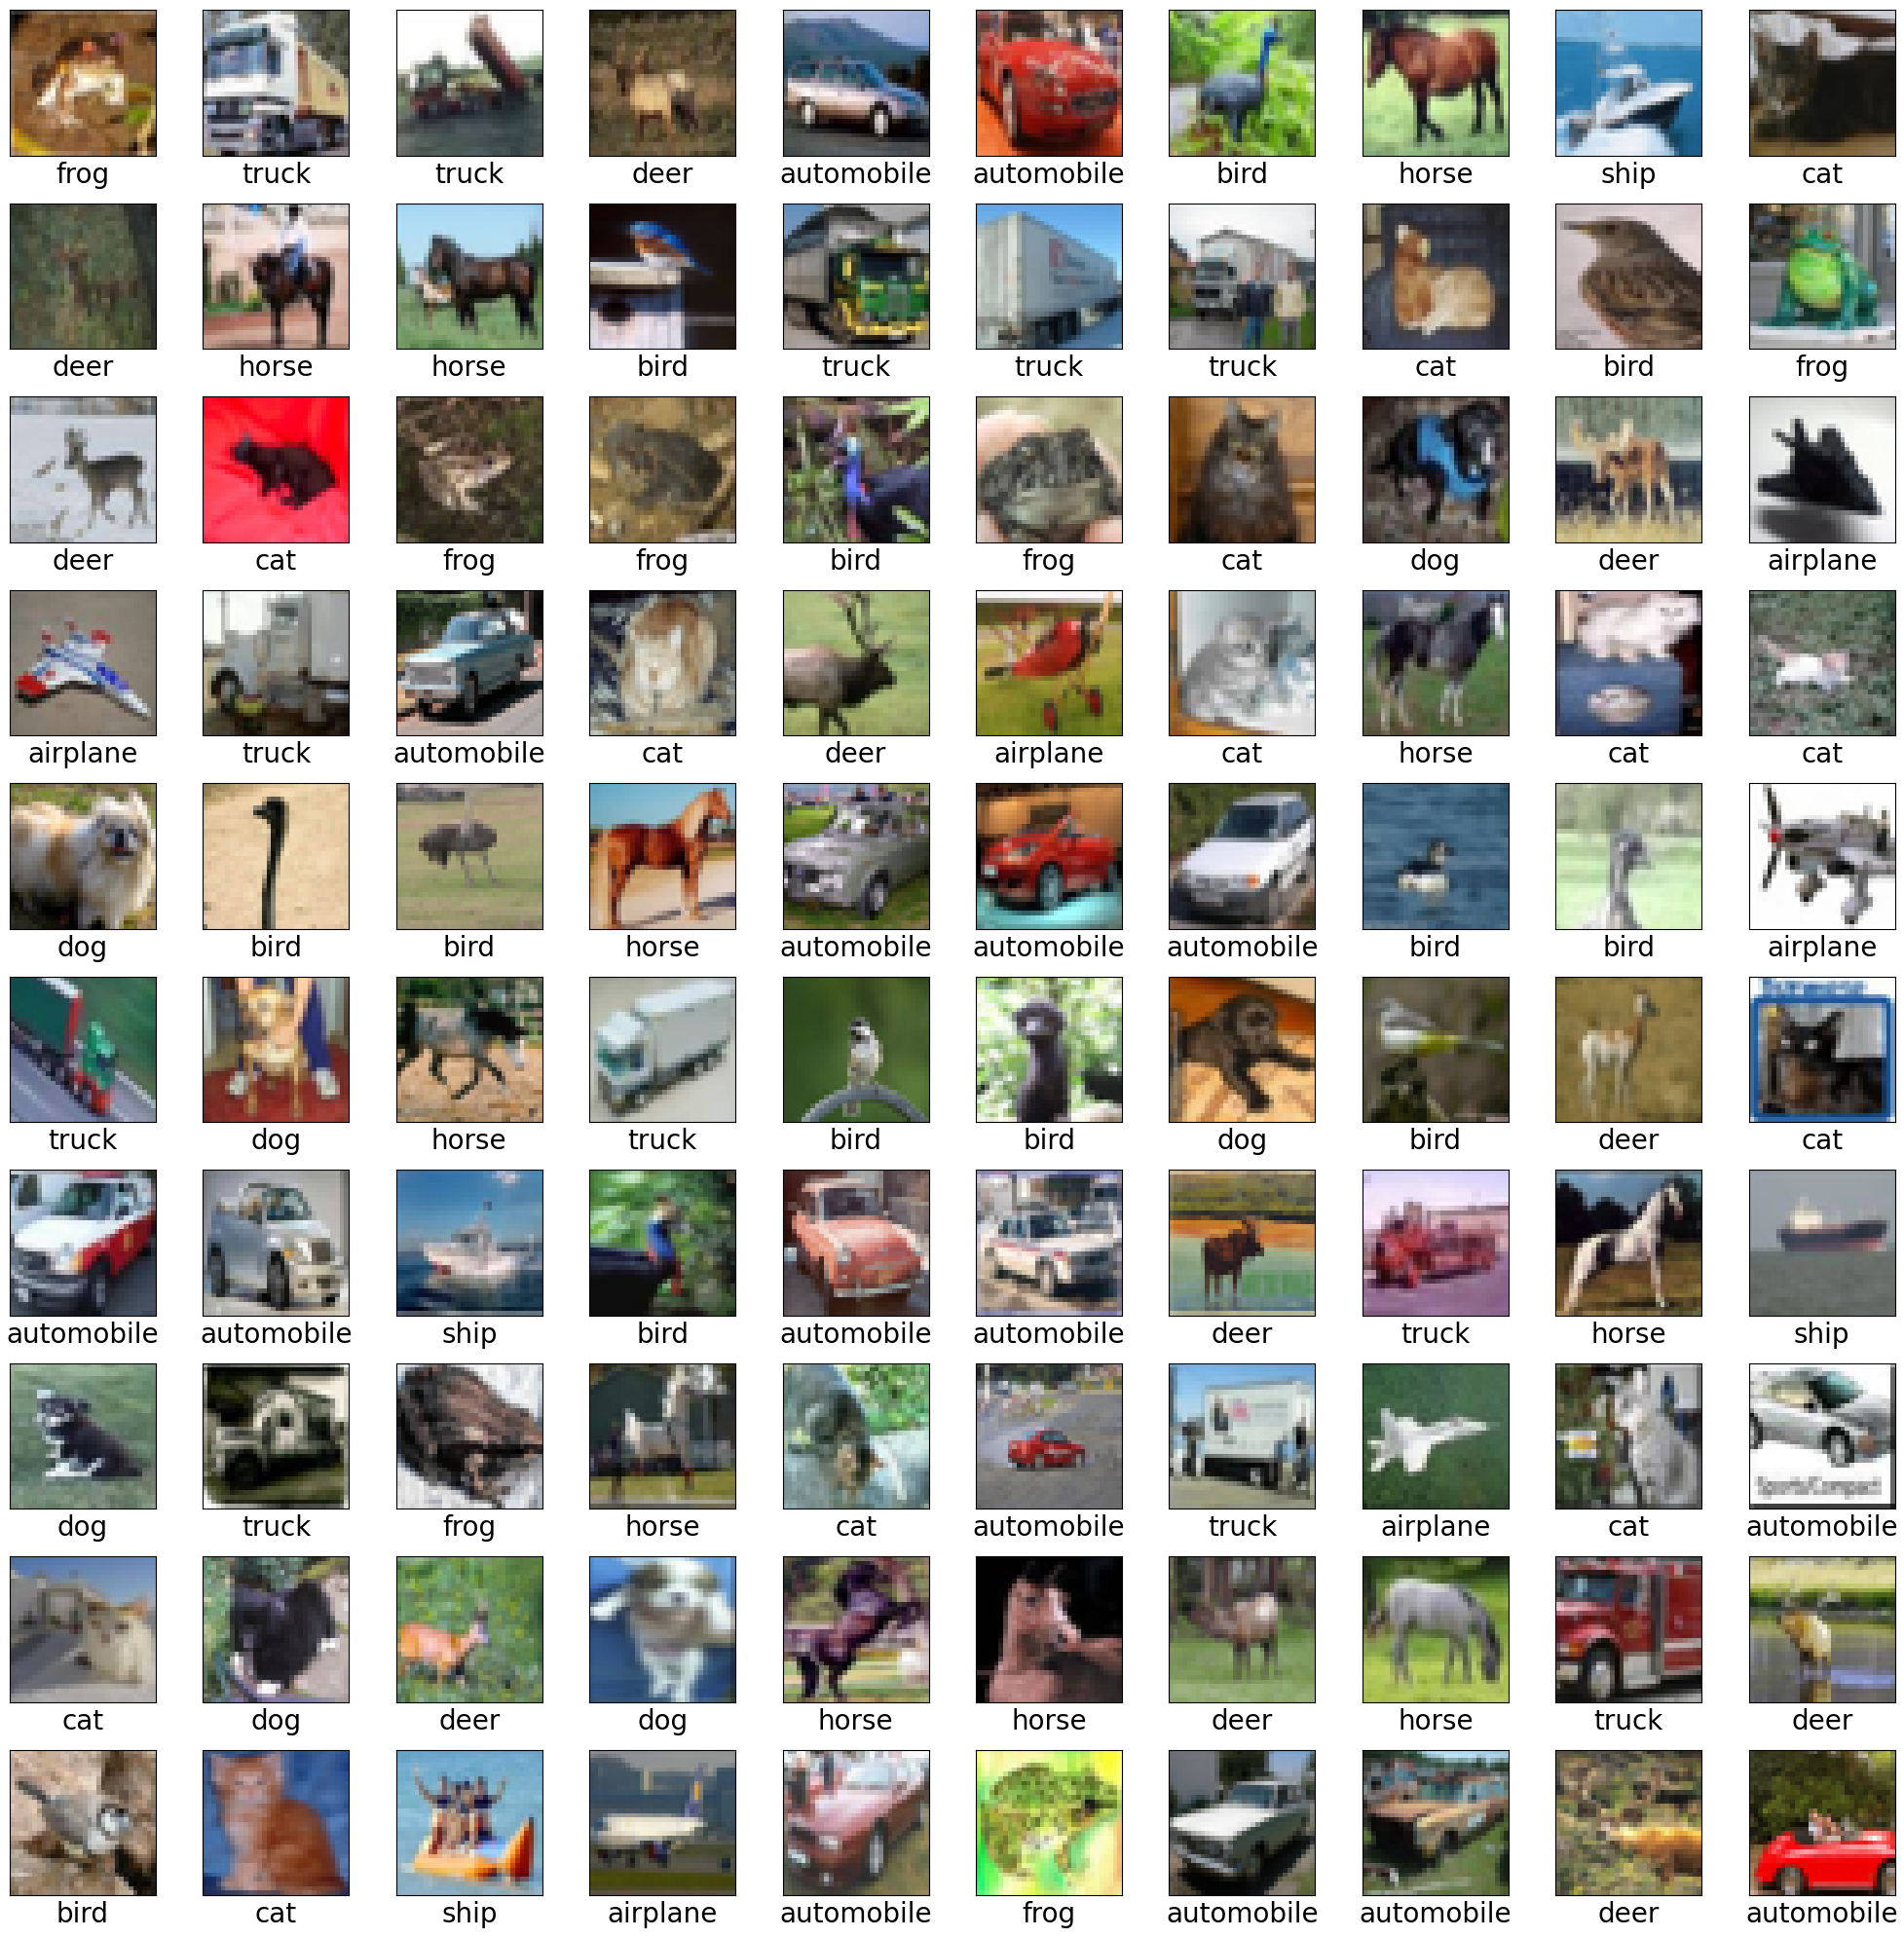

In [7]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))

for i in range(100):
    row = i // 10
    col = i % 10
    ax[row, col].imshow(X_train[i])
    ax[row, col].set_xlabel(classes[y_train[i]], fontsize=20)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    ax[row, col].set_aspect('equal')

for i in range(100, 100):
    row = i // 10
    col = i % 10
    ax[row, col].axis('off')

plt.tight_layout()
plt.show()

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

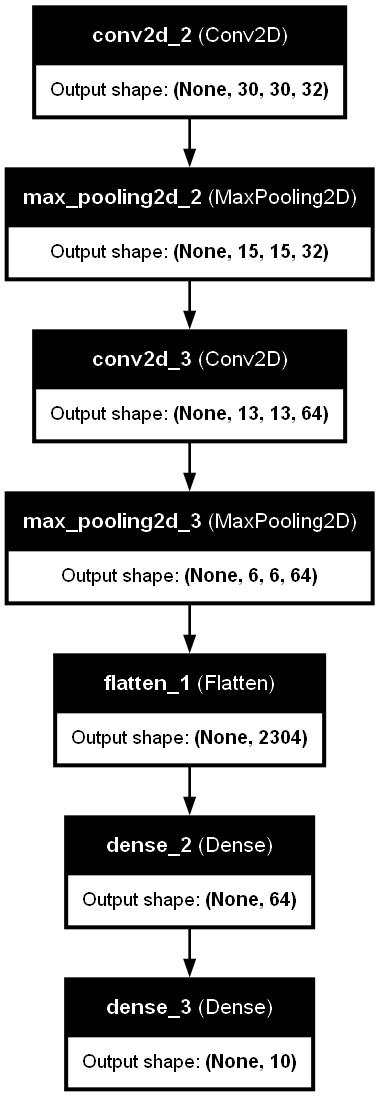

In [10]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=96)

In [11]:
history = model.fit(X_train, y_train, epochs=25)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.3866 - loss: 1.6797
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6086 - loss: 1.1239
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6589 - loss: 0.9771
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6899 - loss: 0.8869
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7218 - loss: 0.8057
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7403 - loss: 0.7446
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7528 - loss: 0.7019
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7691 - loss: 0.6515
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7867 - loss: 0.6108
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8012 - loss: 0.5695
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8102 - loss: 0.5419
Epoch 12

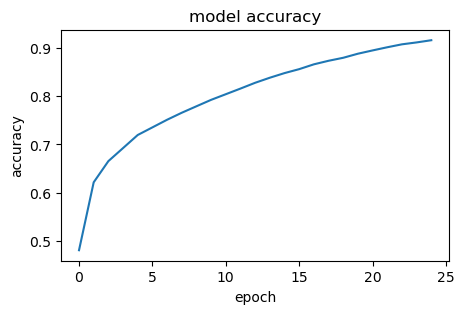

In [12]:
plt.figure(figsize=(5,3))

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [13]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6809 - loss: 1.5912


[1.5860470533370972, 0.679099977016449]

In [14]:
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


[3, 8, 8, 0, 6]

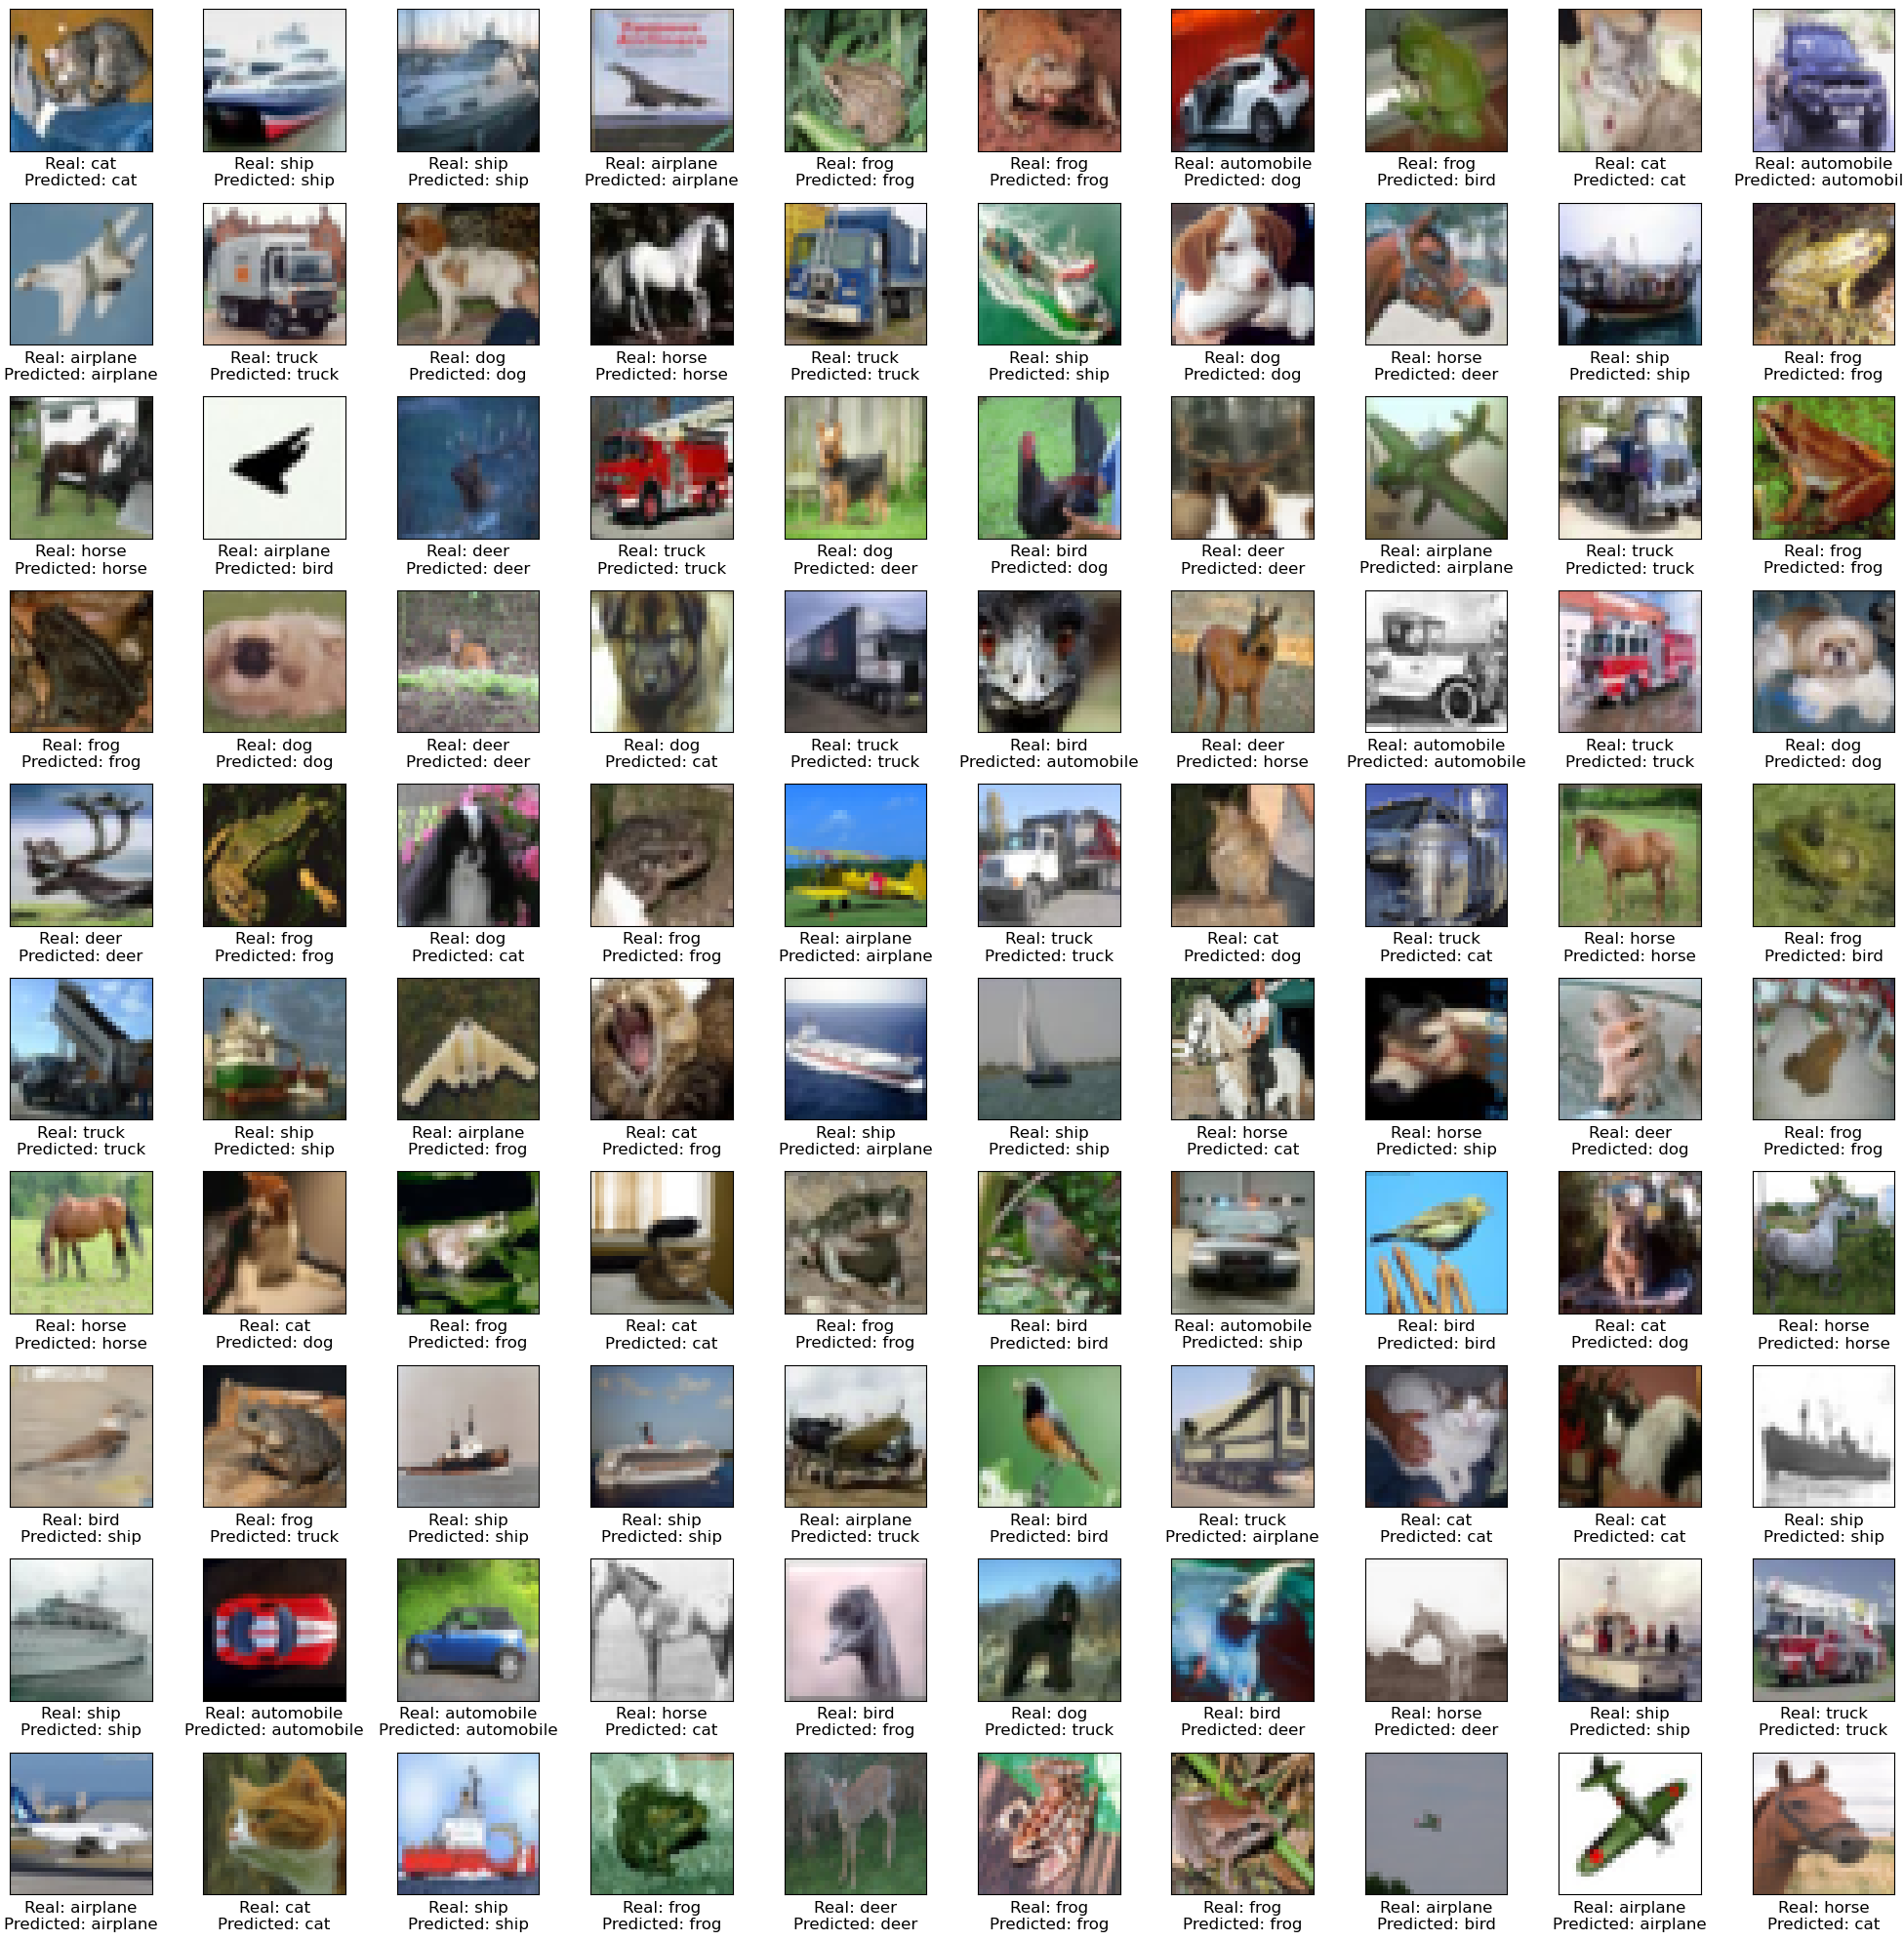

In [15]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))

for i in range(100):
    row = i // 10
    col = i % 10
    ax[row, col].imshow(X_test[i])
    ax[row, col].set_xlabel(f'Real: {classes[y_test[i]]}\nPredicted: {classes[y_pred_classes[i]]}', fontsize=12)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    ax[row, col].set_aspect('equal')

for i in range(100, 100):
    row = i // 10
    col = i % 10
    ax[row, col].axis('off')

plt.tight_layout()
plt.show()